In [ ]:
# Linear Regression Handson
# case-study -- UBER Fare Price Prediction
# Feautres --> distance, location, weekday, peak time, fuel price  etc.....
# to predict the fare price on the basis of feautures given

In [2]:
#required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
df = pd.read_csv("uber.csv") #reading the dataset

In [4]:
df.head() #first 5 rows of the dataset

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
df.drop(['Unnamed: 0','key'], axis=1, inplace=True) # dropping the irrelevant columns
df.head() #updated dataset

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [6]:
df.info() #data type of each feature and non - null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [7]:
df.shape #returns the number of rows and cols

(200000, 7)

In [8]:
df.isnull().sum() #to check the number of null values in the

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [9]:
df['pickup_datetime']

0         2015-05-07 19:52:06 UTC
1         2009-07-17 20:04:56 UTC
2         2009-08-24 21:45:00 UTC
3         2009-06-26 08:22:21 UTC
4         2014-08-28 17:47:00 UTC
                   ...           
199995    2012-10-28 10:49:00 UTC
199996    2014-03-14 01:09:00 UTC
199997    2009-06-29 00:42:00 UTC
199998    2015-05-20 14:56:25 UTC
199999    2010-05-15 04:08:00 UTC
Name: pickup_datetime, Length: 200000, dtype: object

In [10]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime']) # to bifurcate the datetime

df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['weekday'] = df['pickup_datetime'].dt.weekday
df['hour'] = df['pickup_datetime'].dt.hour

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        200000 non-null  float64            
 1   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 2   pickup_longitude   200000 non-null  float64            
 3   pickup_latitude    200000 non-null  float64            
 4   dropoff_longitude  199999 non-null  float64            
 5   dropoff_latitude   199999 non-null  float64            
 6   passenger_count    200000 non-null  int64              
 7   year               200000 non-null  int64              
 8   month              200000 non-null  int64              
 9   weekday            200000 non-null  int64              
 10  hour               200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(5)
memory usage: 16.8 MB


In [12]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,hour
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17


In [13]:
df['hour'].value_counts()

19    12605
18    12072
20    11755
21    11446
22    11023
13    10024
12     9924
23     9805
17     9758
14     9749
15     9614
11     9422
9      9339
8      9075
10     8944
16     8313
0      7844
7      7231
1      5908
2      4422
6      4139
3      3256
4      2365
5      1967
Name: hour, dtype: int64

In [14]:
# pd.cut() function is used here to create new columns 'Monthly_Quarter' and 'Hourly_Segments'.
df['Monthly_Quarter'] = pd.cut(df['month'], bins=[0, 3, 6, 9, 12],
                               labels=['Q1', 'Q2', 'Q3', 'Q4'])

df['Hourly_Segments'] = pd.cut(df['hour'], bins=[0, 3, 7, 11, 15, 19, 23],
                               labels=['H1', 'H2', 'H3', 'H4', 'H5', 'H6'],
                               include_lowest=True)

In [15]:
# segmenting the latitude and longitude values in the appropriate range of -90 to 90 and -180 to 180
df = df.query('(pickup_latitude < 90) & (dropoff_latitude < 90) & \
              (pickup_latitude > -90) & (dropoff_latitude > -90) & \
              (pickup_longitude < 180) & (dropoff_longitude < 180) & \
              (pickup_longitude > -180) & (dropoff_longitude > -180)')


In [16]:
#calculating the distance between pickup and dropoff

import geopy.distance #Geopy library to find the distance between Latitude and Longitude
df['Distance']=[round(geopy.distance.distance(
                   (df.pickup_latitude[i],
                      df.pickup_longitude[i]),
                         (df.dropoff_latitude[i], #iterating in each row of the given columns
                               df.dropoff_longitude[i])).km,2) #getting the distance in kilometers and with 2 decimal point
                                    for i in df.index] #storing the calculated distance in the column

In [17]:
df.drop(['pickup_datetime','month', 'hour','Monthly_Quarter'], axis=1, inplace=True)
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,Hourly_Segments,Distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,3,H5,1.68
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,4,H6,2.45
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,0,H6,5.04
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,4,H3,1.66
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,3,H5,4.48


In [18]:
#Checking the datatypes of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199987 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   fare_amount        199987 non-null  float64 
 1   pickup_longitude   199987 non-null  float64 
 2   pickup_latitude    199987 non-null  float64 
 3   dropoff_longitude  199987 non-null  float64 
 4   dropoff_latitude   199987 non-null  float64 
 5   passenger_count    199987 non-null  int64   
 6   year               199987 non-null  int64   
 7   weekday            199987 non-null  int64   
 8   Hourly_Segments    199987 non-null  category
 9   Distance           199987 non-null  float64 
dtypes: category(1), float64(6), int64(3)
memory usage: 19.5 MB


In [19]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fare_amount,199987.0,11.359849,9.901868,-52.000000,6.000000,8.500000,12.500000,499.000000
pickup_longitude,199987.0,-72.501786,10.449955,-93.824668,-73.992064,-73.981822,-73.967154,40.808425
pickup_latitude,199987.0,39.917937,6.130412,-74.015515,40.734793,40.752592,40.767157,48.018760
dropoff_longitude,199987.0,-72.511608,10.412192,-75.458979,-73.991407,-73.980092,-73.963658,40.831932
dropoff_latitude,199987.0,39.922031,6.117669,-74.015750,40.733823,40.753042,40.768000,45.031598
passenger_count,199987.0,1.684544,1.385999,0.000000,1.000000,1.000000,2.000000,208.000000
year,199987.0,2011.742463,1.856438,2009.000000,2010.000000,2012.000000,2013.000000,2015.000000
weekday,199987.0,3.048383,1.946960,0.000000,1.000000,3.000000,5.000000,6.000000
Distance,199987.0,20.563460,379.663759,0.000000,1.220000,2.120000,3.870000,8783.590000


####The above output illustrates the summary statistics of all the numeric variables like mean, median (50%), standard deviation, minimum, and maximum values, along with the first and third quantiles.

####Note that the minimum amount is -52 and maximum is 499. Ideally fare amount should not be less that 2.5 dollars, which is the minimum value set for fares. Also the minimum count of passengers is 0, which isn't a practical scenario. We will deal with such values as we progress the case study.

In [20]:
df.columns[df.dtypes == 'object']

Index([], dtype='object')

Detecting outliers is crucial in data analysis as outliers are observations that significantly deviate from the general pattern or distribution of the data. Failing to identify and handle outliers properly can have negative consequences on model accuracy and the validity of statistical analyses. In this case study, we aim to identify extreme values in the data, which can be considered as outliers.

The outliers in this particular case study can be defined by the following criteria:

1.   Amount < -52: Any observation with an amount less than -52 can be identified as an outlier.

2.   Trips with travel distance less than or equal to 0 and more than 130 kilometers: Trips with a travel distance that is either negative or exceeds 130 kilometers can be considered outliers.

3.   Trips with latitude values outside the range -90 to 90 and longitude values outside the range -180 to 180: Any trips with latitude values less than -90 or greater than 90, as well as longitude values less than -180 or greater than 180, can be identified as outliers.

By identifying and addressing these outliers, we can ensure that our analysis and models are based on a more representative and accurate dataset. Removing or appropriately handling outliers can help prevent distorted insights and misleading conclusions.

In [21]:
df['fare_amount'].min()

-52.0

In [22]:
numeric_columns = df.select_dtypes(include=np.number).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median().to_dict())

C:\Users\Shreyas\AppData\Local\Temp\ipykernel_12680\128047415.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Shreyas\AppData\Local\Temp\ipykernel_12680\128047415.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Shreyas\AppData\Local\Temp\ipykernel_12680\128047415.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Shreyas\AppData\Local\Temp\ipykernel_12680\128047415.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Shreyas\AppData\Local\Temp\ipykernel_12680\128047415.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Shreyas\AppData\Local\Temp\ipykernel_12680\128047415.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Shreyas\AppData\Local\Temp\ipykernel_12680\128047415.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Shre

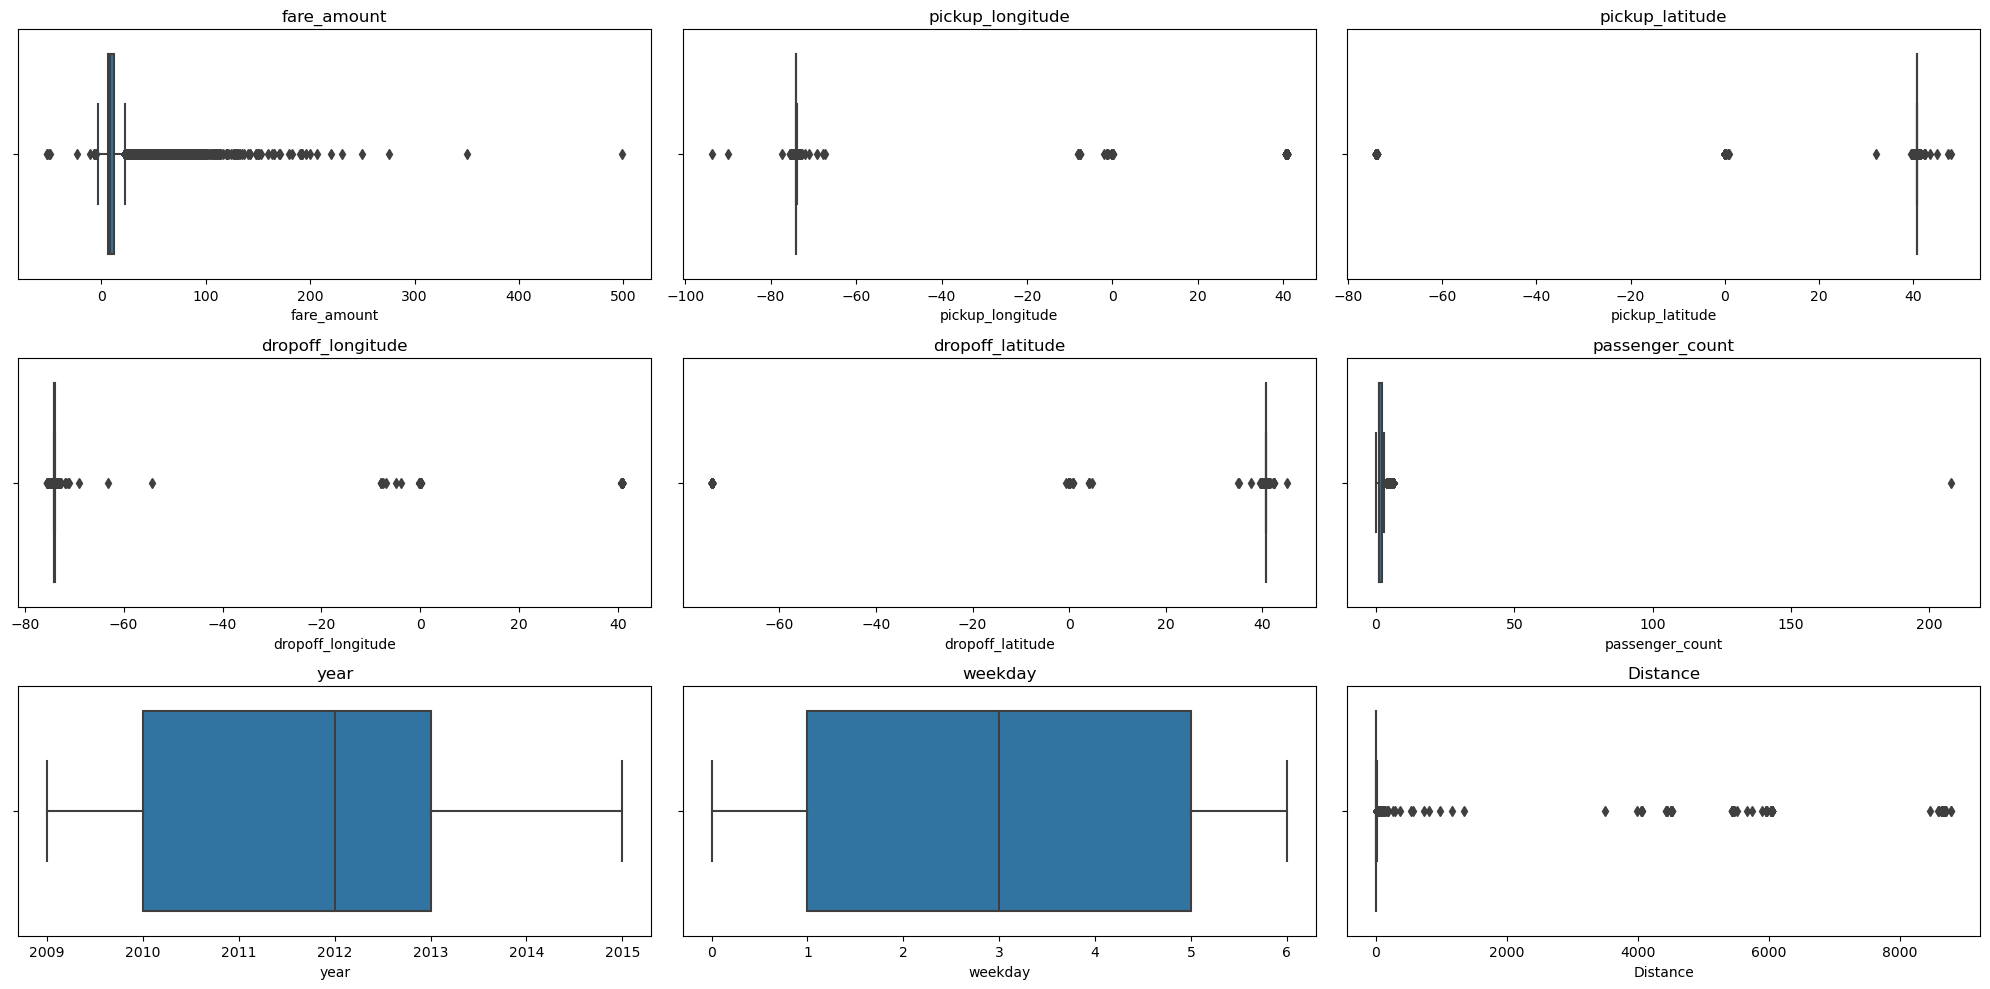

In [23]:
# outliers detection using boxplot
plt.figure(figsize=(20,10)) #deciding the figure size

for i, col in enumerate(numeric_columns):
    plt.subplot(3,3, i + 1)
    sns.boxplot(x=df[col], whis=1.5)
    plt.tight_layout()
    plt.title(col)

plt.show()

In [24]:
#remove the outliers from the dataset
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df1[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1

def treat_outliers_all(df1 , col_list):
    for c in col_list:
        df1 = remove_outlier(df1 , c)
    return df1

In [25]:
df = treat_outliers_all(df , numeric_columns)

C:\Users\Shreyas\AppData\Local\Temp\ipykernel_12680\3810504922.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Shreyas\AppData\Local\Temp\ipykernel_12680\3810504922.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Shreyas\AppData\Local\Temp\ipykernel_12680\3810504922.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Shreyas\AppData\Local\Temp\ipykernel_12680\3810504922.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Shreyas\AppData\Local\Temp\ipykernel_12680\3810504922.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Shreyas\AppData\Local\Temp\ipykernel_12680\3810504922.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Shreyas\AppData\Local\Temp\ipykernel_12680\3810504922.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Use

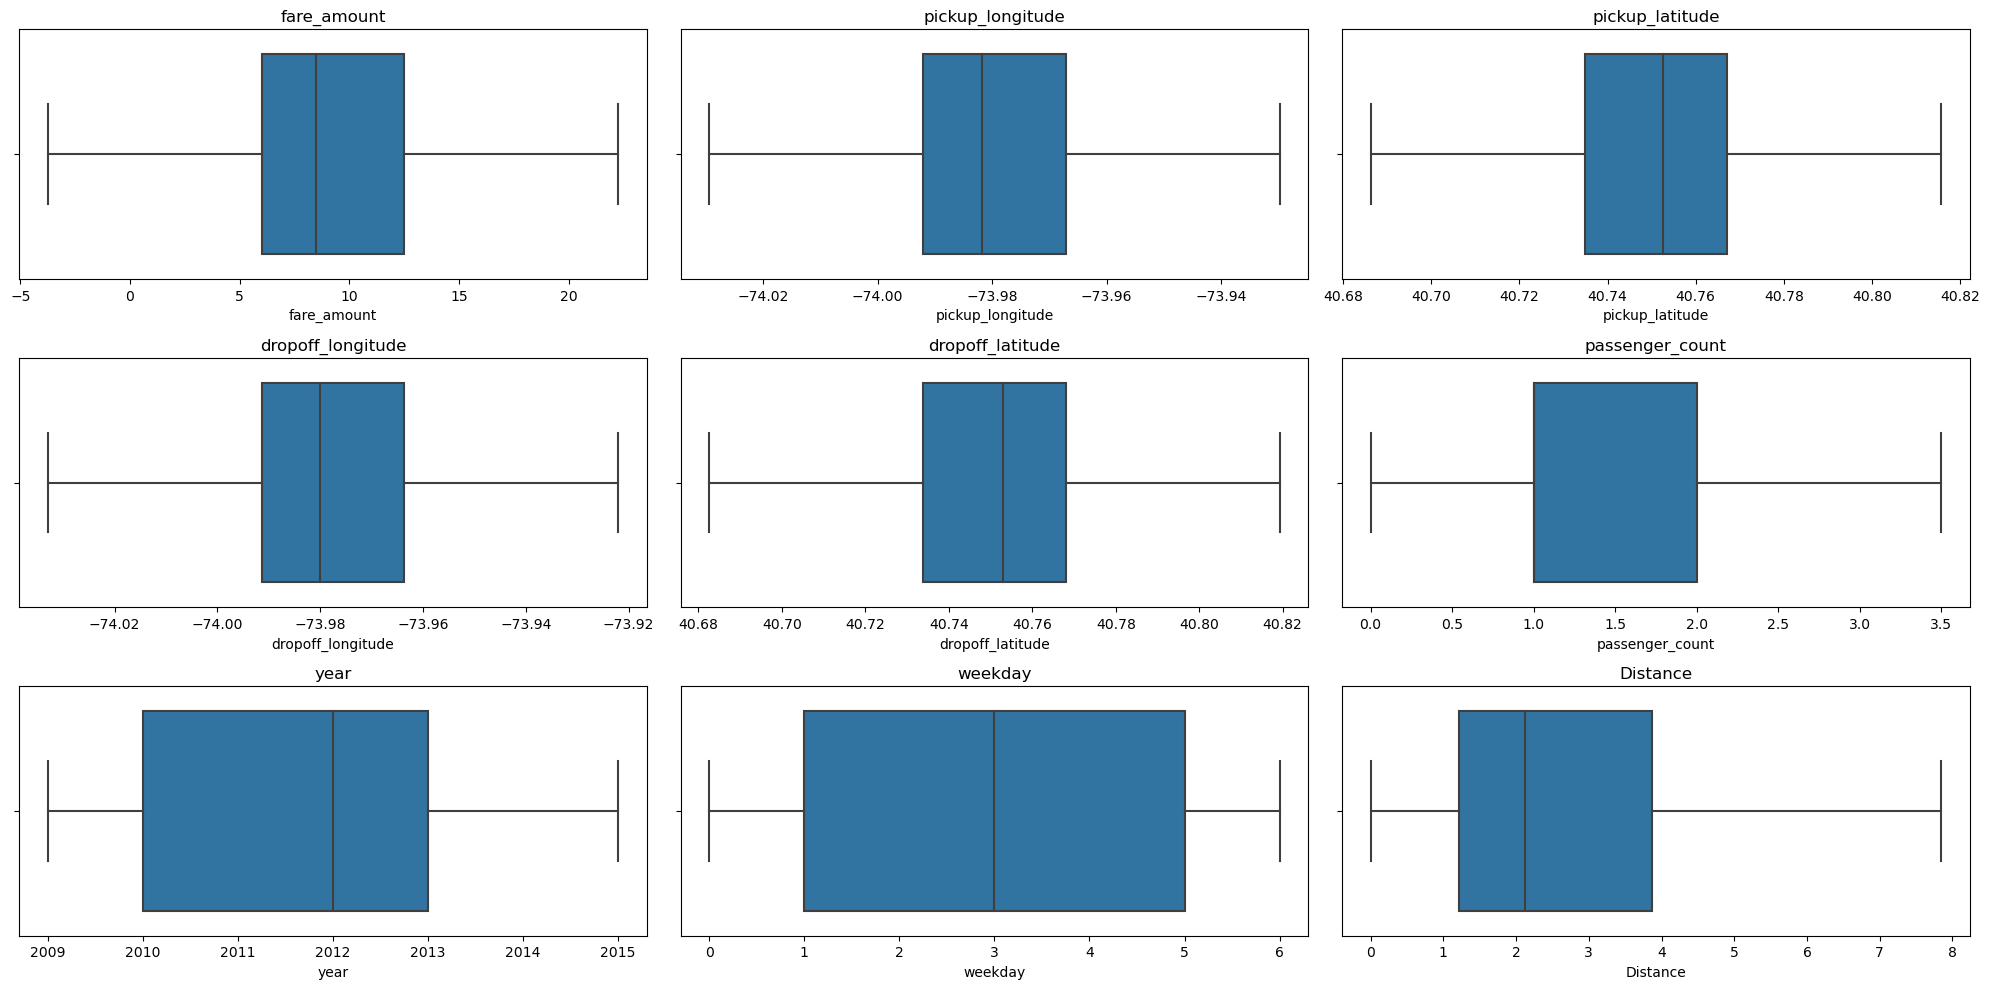

In [26]:
# outliers detection using boxplot
plt.figure(figsize=(20,10))

for i, col in enumerate(numeric_columns):
    plt.subplot(3,3, i + 1)
    sns.boxplot(x=df[col], whis=1.5)
    plt.tight_layout()
    plt.title(col)

plt.show()

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fare_amount,199987.0,10.080998,5.440187,-3.750000,6.000000,8.500000,12.500000,22.250000
pickup_longitude,199987.0,-73.978309,0.020505,-74.029429,-73.992064,-73.981822,-73.967154,-73.929789
pickup_latitude,199987.0,40.750194,0.025658,40.686248,40.734793,40.752592,40.767157,40.815702
dropoff_longitude,199987.0,-73.976192,0.022879,-74.033030,-73.991407,-73.980092,-73.963658,-73.922034
dropoff_latitude,199987.0,40.750151,0.028659,40.682558,40.733823,40.753042,40.768000,40.819266
passenger_count,199987.0,1.514376,0.876714,0.000000,1.000000,1.000000,2.000000,3.500000
year,199987.0,2011.742463,1.856438,2009.000000,2010.000000,2012.000000,2013.000000,2015.000000
weekday,199987.0,3.048383,1.946960,0.000000,1.000000,3.000000,5.000000,6.000000
Distance,199987.0,2.852147,2.219375,0.000000,1.220000,2.120000,3.870000,7.845000


In [28]:
#We will only keep the observation where fare is more than O USD
df = df.loc[(df.fare_amount > 0)]

In [29]:
#We will only keep the distance where distance is more than 0 km.
df = df.loc[(df.Distance > 0)]

In [30]:
df.describe() #descritive stats of dataset in the transpose form

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,Distance
count,193971.000000,193971.000000,193971.000000,193971.000000,193971.000000,193971.000000,193971.000000,193971.000000,193971.000000
mean,10.095386,-73.979308,40.751392,-73.977284,40.751418,1.514979,2011.747921,3.048719,2.940346
std,5.422990,0.019448,0.024245,0.021725,0.027312,0.876954,1.859722,1.946754,2.195024
min,0.010000,-74.029429,40.686248,-74.033030,40.682558,0.000000,2009.000000,0.000000,0.010000
25%,6.000000,-73.992268,40.736368,-73.991587,40.735241,1.000000,2010.000000,1.000000,1.290000
50%,8.500000,-73.982117,40.753260,-73.980542,40.753715,1.000000,2012.000000,3.000000,2.190000
75%,12.500000,-73.968422,40.767513,-73.965453,40.768318,2.000000,2013.000000,5.000000,3.960000
max,22.250000,-73.929789,40.815702,-73.922034,40.819266,3.500000,2015.000000,6.000000,7.845000


In [31]:
df.shape

(193971, 10)

In [32]:
corr = df.corr()
corr.style.background_gradient(cmap='Oranges')

C:\Users\Shreyas\AppData\Local\Temp\ipykernel_12680\3379373121.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,Distance
fare_amount,1.000000,0.168744,-0.119346,0.238466,-0.134819,0.017295,0.142253,0.013270,0.879837
pickup_longitude,0.168744,1.000000,0.417859,0.342570,0.195939,-0.013358,0.013130,-0.026187,0.176578
pickup_latitude,-0.119346,0.417859,1.000000,0.175794,0.446075,-0.015487,-0.014102,-0.045406,-0.117764
dropoff_longitude,0.238466,0.342570,0.175794,1.000000,0.392589,-0.009124,0.013989,-0.003155,0.272251
dropoff_latitude,-0.134819,0.195939,0.446075,0.392589,1.000000,-0.008223,-0.008979,-0.033840,-0.104459
passenger_count,0.017295,-0.013358,-0.015487,-0.009124,-0.008223,1.000000,-0.009403,0.049121,0.009090
year,0.142253,0.013130,-0.014102,0.013989,-0.008979,-0.009403,1.000000,0.006024,0.021336
weekday,0.013270,-0.026187,-0.045406,-0.003155,-0.033840,0.049121,0.006024,1.000000,0.027966
Distance,0.879837,0.176578,-0.117764,0.272251,-0.104459,0.009090,0.021336,0.027966,1.000000


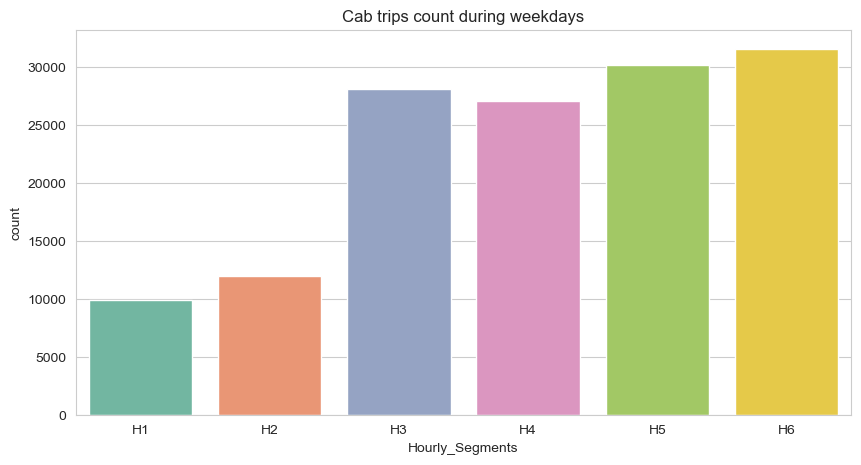

In [33]:
# Set the figure size, grid type, and color palette
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
sns.set_palette("Set2")

# Set the title
plt.title('Cab trips count during weekdays')

# Plot the countplot for weekdays
sns.countplot(x='Hourly_Segments', data=df.loc[(df.weekday >= 0) & (df.weekday <= 4)])

# Show the plot
plt.show()

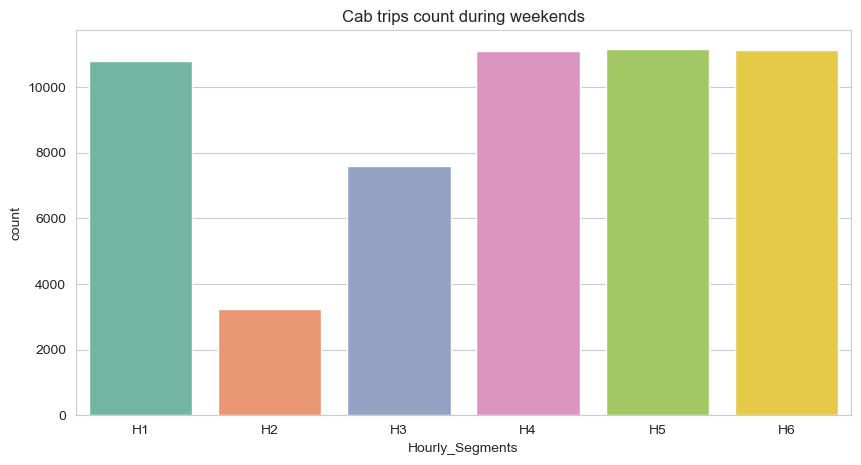

In [35]:
# Set the figure size, grid type, and color palette
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
sns.set_palette("Set2")

# Set the title
plt.title('Cab trips count during weekends')

# Plot the countplot for weekends
sns.countplot(x='Hourly_Segments', data=df.loc[(df.weekday >= 5) & (df.weekday <= 6)])

# Show the plot
plt.show()

In [36]:
# Filter the dataset for weekdays and weekends
week_days = df.loc[(df.weekday >= 0) & (df.weekday <= 4)]
week_ends = df.loc[(df.weekday >= 5) & (df.weekday <= 6)]

# Compute the mean fare amount for weekdays and weekends
week_days_fare = week_days.groupby('Hourly_Segments')['fare_amount'].mean().reset_index()
week_ends_fare = week_ends.groupby('Hourly_Segments')['fare_amount'].mean().reset_index()

In [37]:
week_days_fare

,Hourly_Segments,fare_amount
0,H1,10.660578
1,H2,10.100999
2,H3,9.975095
3,H4,10.147620
4,H5,9.877003
5,H6,10.126527


In [38]:
week_ends_fare

,Hourly_Segments,fare_amount
0,H1,10.533564
1,H2,11.369094
2,H3,9.514333
3,H4,9.969476
4,H5,9.996106
5,H6,10.089233


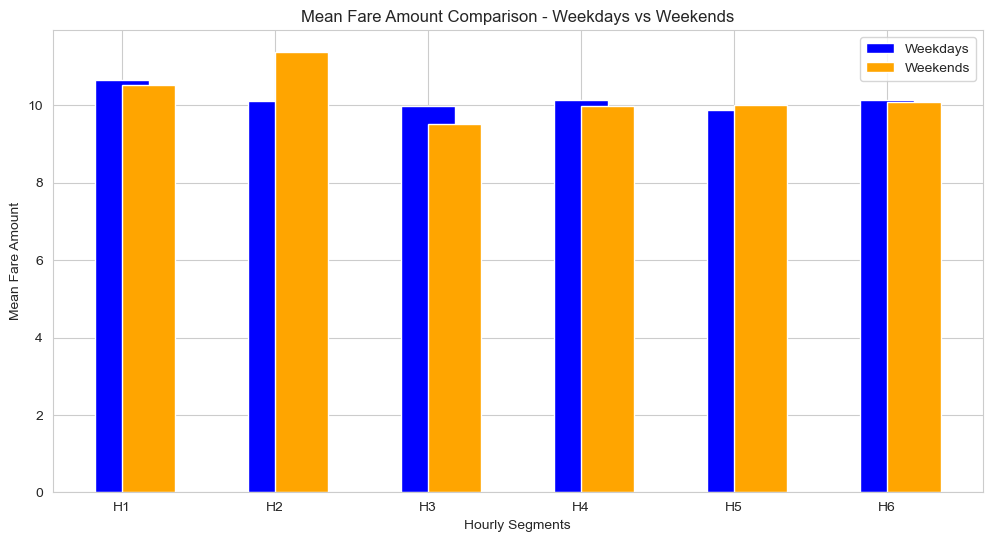

In [39]:
# Set the figure size, grid type, and color palette
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.set_palette("Set2")
plt.title('Mean Fare Amount Comparison - Weekdays vs Weekends')
bar_width = 0.35

# Plot the bar plot for weekdays
plt.bar(week_days_fare['Hourly_Segments'], week_days_fare['fare_amount'], width=bar_width, color='blue', align='center', label='Weekdays')

# Plot the bar plot for weekends
plt.bar(week_ends_fare['Hourly_Segments'], week_ends_fare['fare_amount'], width=bar_width, color='orange', align='edge', label='Weekends')

# Set the x-axis label
plt.xlabel('Hourly Segments')

# Set the y-axis label
plt.ylabel('Mean Fare Amount')

# Set the legend
plt.legend()

# Show the plot
plt.show()

C:\Users\Shreyas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


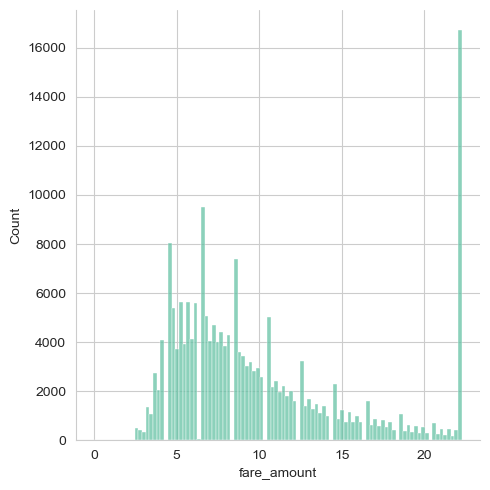

In [40]:
sns.displot(df['fare_amount'])

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Hourly_Segments'] = le.fit_transform(df['Hourly_Segments'])

In [42]:
df['Hourly_Segments'].value_counts()

5    42711
4    41380
3    38183
2    35717
0    20763
1    15217
Name: Hourly_Segments, dtype: int64

In [43]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,Hourly_Segments,Distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,2015,3,4,1.68
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,2009,4,5,2.45
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,2009,0,5,5.04
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,2009,4,2,1.66
4,16.0,-73.929789,40.744085,-73.973082,40.761247,3.5,2014,3,4,4.48


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
X = df.drop('fare_amount', axis=1) # independent variable
y = df['fare_amount'] #target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Creating and training the linear regression model
model = LinearRegression() # initializing the object for Linear regression model
model.fit(X_train, y_train)

LinearRegression()

In [46]:
# Predicting fare amounts on the test set
y_pred = model.predict(X_test)
y_pred

array([ 8.61395127,  6.14190814, 10.90112464, ...,  6.72912516,
       12.55177873,  9.04386645])

In [47]:
# Calculating R^2 score
r2 = r2_score(y_test, y_pred)
r2

0.7950740607584368

In [48]:
# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
mse

6.050208794111036

In [49]:
def predict_fare(user_inputs):
    input_values = [user_inputs['pickup_longitude'], user_inputs['pickup_latitude'],
                    user_inputs['dropoff_longitude'], user_inputs['dropoff_latitude'],
                    user_inputs['passenger_count'], user_inputs['year'],
                    user_inputs['weekday'], user_inputs['Hourly_Segments'],
                    user_inputs['Distance']]

    fare_prediction = model.predict([input_values])[0]
    return fare_prediction

In [50]:
user_inputs = {
    'pickup_longitude': -73.9821,
    'pickup_latitude': 40.7488,
    'dropoff_longitude': -73.9853,
    'dropoff_latitude': 40.7550,
    'passenger_count': 5,
    'year': 2023,
    'weekday': 3,
    'Hourly_Segments': 10,
    'Distance': 2.5
}

predicted_fare = predict_fare(user_inputs)

C:\Users\Shreyas\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [51]:
# Printing results
print("Predicted Fare Amount:", predicted_fare)

Predicted Fare Amount: 13.672554801631804


In [ ]:
# optimization
1. Feature Engineering
2. Feature Selection
3. Feature Scaling
4. Gradient Descent -- don't go for this
5. Hyperparametertuning